In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

100%|██████████| 2000/2000 [00:52<00:00, 38.20it/s]


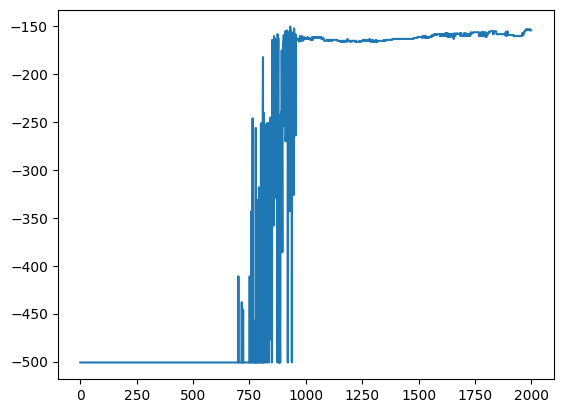

In [ ]:
mc = MountainCar()

alg = TrueOnlineSARSALambda(mc, M=3, tdr=0.5, alpha=0.001)

alg.reset()
Gs = alg.run()

plt.clf()
plt.plot(range(len(Gs)), Gs)

100%|██████████| 2000/2000 [02:11<00:00, 15.24it/s]


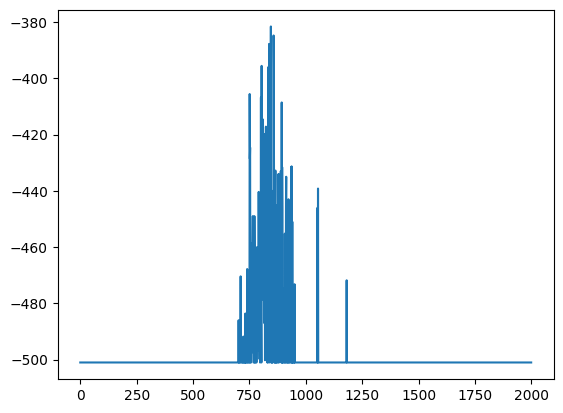

In [2]:
num_trials = 5
mc = MountainCar()

hp_settings = [
    (3, 0.5, 0.001),
    (5, 0.5, 0.001),
    (3, 0.4, 0.001),
    (3, 0.6, 0.001),
    (3, 0.5, 0.01),
    (3, 0.5, 0.005),
    (2, 0.5, 0.001)
]

for h in hp_settings:
    M, tdr, alpha = h

    alg = TrueOnlineSARSALambda(mc, M=M, tdr=tdr, alpha=alpha, approach='epsilon-greedy')
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/SARSALambda/MountainCar/M-{M}-lambda-{tdr}-alpha-{alpha}.png', facecolor='white')